In [1]:
import matplotlib.pyplot as plt 
import pandas as pd 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import numpy as np
from pandas import get_dummies, Series
from math import ceil
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix 
from sklearn import svm
from sklearn import linear_model
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPRegressor


In [2]:
df = pd.read_csv('finished_alla.csv')

In [3]:
df.head()

,game_title,release_year,num_of_critics,critics_grade,game_summary,user_grade,platform,num_of_users,game_num_of_players,game_developer
0,Super Mario Galaxy 2,2010,87,97,"Super Mario Galaxy 2, the sequel to the galaxy...",9.1,Wii,2948,No Online Multiplayer,Nintendo
1,Red Dead Redemption 2,2018,33,97,Developed by the creators of Grand Theft Auto ...,8.2,XboxOne,4767,Up to 32,Rockstar
2,Grand Theft Auto V,2014,14,97,Great Game. The best GTA now enhanced by the X...,7.9,XboxOne,1760,Up to 30,Rockstar
3,Grand Theft Auto V,2013,50,97,"Los Santos is a vast, sun-soaked metropolis fu...",8.3,PlayStation3,4994,Up to 16,Rockstar
4,Disco Elysium: The Final Cut,2021,11,97,Disco Elysium - The Final Cut is the definitiv...,8.3,PC,782,No Online Multiplayer,ZA/UM


In [4]:
#let's reduse the non-numeric columns from the data:
#we chose not to use game summary becasue is was not relavent to the prediction
#we would have liked use the game developer column and game num of players column but we ran into problems. 
#we chose to not use "game developer"as a feature for the new df,the game developer had too many developers and caused data sparsity
#num of players column has problems with the data

In [5]:
df2 = df[['release_year','platform','critics_grade','num_of_critics','user_grade']]

In [6]:
#In the next cell we define a new binery column that indicates popularity based on 200 ratings and more.
#Because we assume that users will not rate a game if they dont like it.
#After that, we add it to the data frame.

In [7]:
#link to solution from StackOverflow: https://stackoverflow.com/questions/20625582/how-to-deal-with-settingwithcopywarning-in-pandas

df2['Popularity'] = df['num_of_users']
def Popularity(ratings):
    if ratings >= 200:
        return 1
    else:
        return 0

df2['Popularity'] = df2['Popularity'].apply(lambda x: Popularity(x))

/var/folders/f3/xvgpmhpd1hv8t3f335drlh3c0000gn/T/ipykernel_14138/2253227038.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Popularity'] = df['num_of_users']
/var/folders/f3/xvgpmhpd1hv8t3f335drlh3c0000gn/T/ipykernel_14138/2253227038.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Popularity'] = df2['Popularity'].apply(lambda x: Popularity(x))


In [8]:
#Here is the new data frame:

In [9]:
df2

,release_year,platform,critics_grade,num_of_critics,user_grade,Popularity
0,2010,Wii,97,87,9.1,1
1,2018,XboxOne,97,33,8.2,1
2,2014,XboxOne,97,14,7.9,1
3,2013,PlayStation3,97,50,8.3,1
4,2021,PC,97,11,8.3,1
...,...,...,...,...,...,...
7936,2011,Xbox360,50,18,4.3,0
7937,2011,PlayStation3,50,33,5.1,0
7938,2010,Xbox360,50,9,5.6,0
7939,2018,Switch,50,7,5.0,0


<AxesSubplot:xlabel='critics_grade', ylabel='Popularity'>

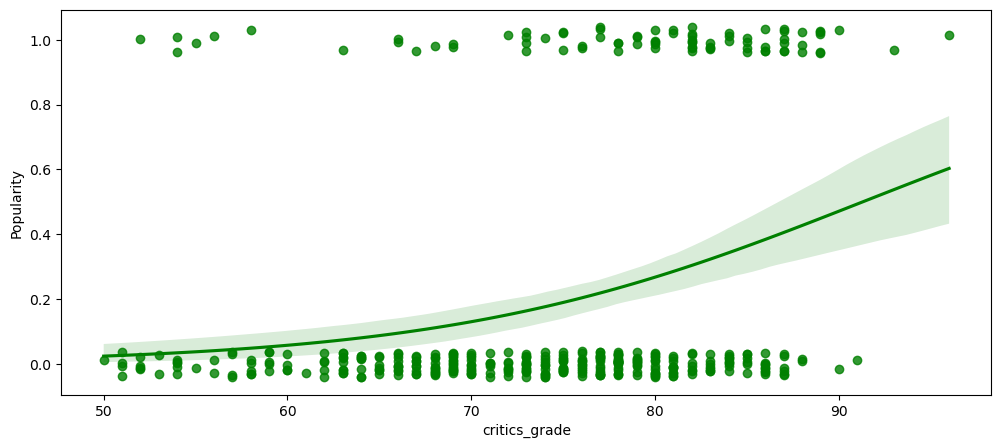

In [10]:
n = ceil(0.05 * len(df2['Popularity']))
fig, ax = plt.subplots(1,1, figsize=(12,5))
sns.regplot(x="critics_grade", y="Popularity", data=df2.sample(n=n),logistic=True, n_boot=500, y_jitter=0.04, color="green")

In [ ]:
# as we can see there are more unpopular games then popular games



In [11]:
df_copy = pd.get_dummies(df2)

In [21]:
df_copy.columns.tolist()

['release_year',
 'critics_grade',
 'num_of_critics',
 'user_grade',
 'Popularity',
 'platform_3DS',
 'platform_DS',
 'platform_PC',
 'platform_PSP',
 'platform_PlayStation3',
 'platform_PlayStation4',
 'platform_PlayStation5',
 'platform_PlayStationVita',
 'platform_Stadia',
 'platform_Switch',
 'platform_Wii',
 'platform_WiiU',
 'platform_Xbox360',
 'platform_XboxOne',
 'platform_XboxSeriesX']

In [ ]:
#Declaring variables to use with train-test method

In [12]:
features = [l for l in df_copy.columns.tolist() if l != 'Popularity']
target = 'Popularity'

Xtrain, Xtest, ytrain, ytest = train_test_split(df_copy[features], df_copy[target], test_size=0.2)
Xtrain.shape, ytrain.shape, Xtest.shape, ytest.shape

((6352, 19), (6352,), (1589, 19), (1589,))

In [13]:
# Data label balance
ytrain.value_counts(normalize=True)

0    0.767947
1    0.232053
Name: Popularity, dtype: float64

In [14]:
#lets see the precision score for random forest module
from sklearn.metrics import accuracy_score, precision_score, recall_score

radm = RandomForestClassifier(random_state=2).fit(Xtrain, ytrain)
y_pred = radm.predict(Xtest)
precision_score(ytest, y_pred)

0.7755102040816326

In [15]:
#recall score for random forest:
recall_score(ytest, y_pred)

0.6145552560646901

In [16]:
#lets see the precision score for logistic regresion module:
log_reg = LogisticRegression(max_iter=2000).fit(Xtrain, ytrain)
y_pred = log_reg.predict(Xtest)
precision_score(ytest, y_pred)

0.7596899224806202

In [22]:
all_predictions = log_reg.predict(Xtest)
print(classification_report(ytest, all_predictions))

              precision    recall  f1-score   support

           0       0.87      0.95      0.91      1218
           1       0.76      0.53      0.62       371

    accuracy                           0.85      1589
   macro avg       0.81      0.74      0.77      1589
weighted avg       0.84      0.85      0.84      1589



In [ ]:
#as we can see the precision score is 0.87 for predicting unpopular games
#and 0.76 precision score for predicting popular games
# now we can assume that our module is better for predicting unpopular games than popular based on our data.

[Text(0.5, 25.722222222222214, 'Predicted Value'),
 Text(0.5, 1.0, 'Training Set Confusion Matrix'),
 Text(33.22222222222222, 0.5, 'Expected Value')]

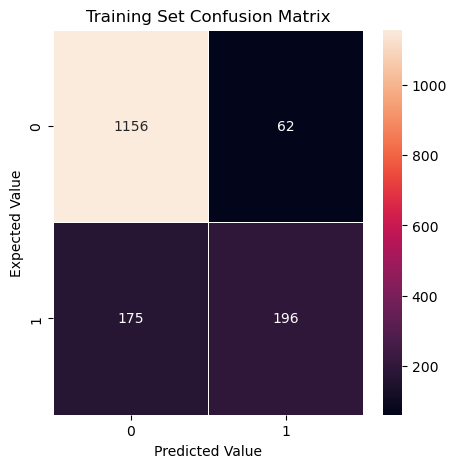

In [18]:
fig, ax = plt.subplots(figsize=(5,5))
sns.heatmap(confusion_matrix(ytest, all_predictions), annot=True, linewidths=.5, ax=ax, fmt="d").set(xlabel='Predicted Value', title='Training Set Confusion Matrix', ylabel='Expected Value')

In [ ]:
#for our last test we try diffrent modules to see if any module works better  

In [19]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

models = [
    RandomForestClassifier(random_state=2),
    DecisionTreeClassifier(),
    DecisionTreeClassifier(max_depth=5),
    DecisionTreeClassifier(max_depth=10),
    DecisionTreeClassifier(max_depth=15),
    LogisticRegression(max_iter=200)
]

for clf in models:
    clf.fit(Xtrain, ytrain)
    y_pred = clf.predict(Xtest)
    print(precision_score(ytest, y_pred))

0.7755102040816326
0.6226912928759895
0.73992673992674
0.7544483985765125
0.6598837209302325
0.7596899224806202


In [ ]:
#the best module was the random forest for prediction of popular games based on our data